### MagLev losses: calculations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Set the style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

df_FC_Long_1 = pd.read_csv('../Data/FC/FC_Long_1.csv', skiprows = 1, delimiter = ';')
print(f'Read {len(df_FC_Long_1)} rows.')

Read 1870 rows.


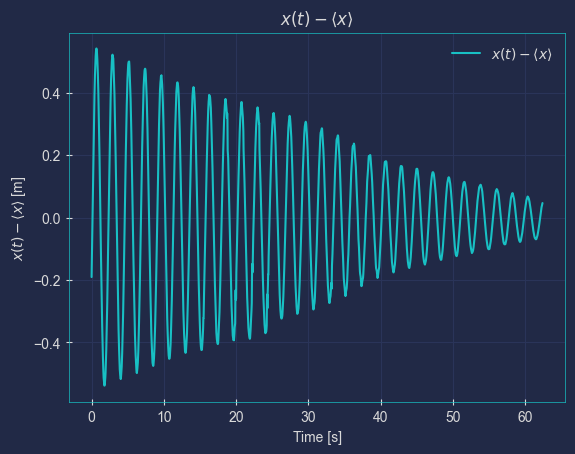

In [4]:
# Read the data
t = df_FC_Long_1['t']
x = df_FC_Long_1['x']
y = df_FC_Long_1['y']

# Plot the data
plt.plot(t, x - np.mean(x), label = r'$x(t) - \left<x\right>$')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t) - \left<x\right>$ [m]')
plt.ylim(-max(x - np.mean(x)) - 0.05, max(x - np.mean(x)) + 0.05)
plt.title(r'$x(t) - \left<x\right>$')
plt.legend()
plt.show()

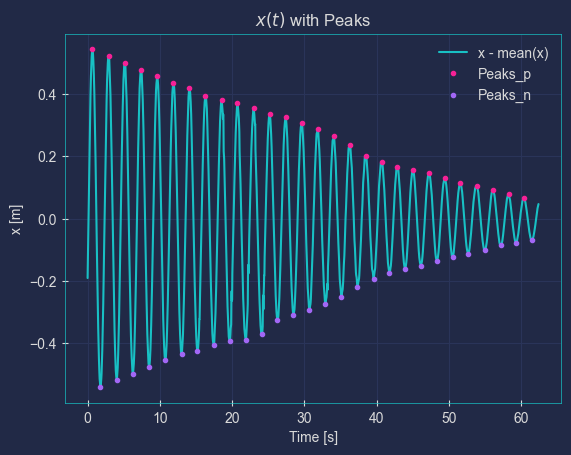

In [5]:
# Find the peaks
new_x = x - np.mean(x)
peaks_p, _ = find_peaks(new_x, distance = 35, prominence = 0.1) # t[35] = 1.166 s. This is the minimum time between peaks.
peaks_n, _ = find_peaks(-new_x, distance = 35, prominence=0.1)

# Plot the data with peaks
plt.plot(t, new_x, label='x - mean(x)')
plt.plot(t[peaks_p], new_x[peaks_p], '.C1', label='Peaks_p')
plt.plot(t[peaks_n], new_x[peaks_n], '.C2', label='Peaks_n')
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.ylim(-max(new_x) - 0.05, max(new_x) + 0.05)
plt.title(r'$x(t)$ with Peaks')
plt.legend()
plt.show()


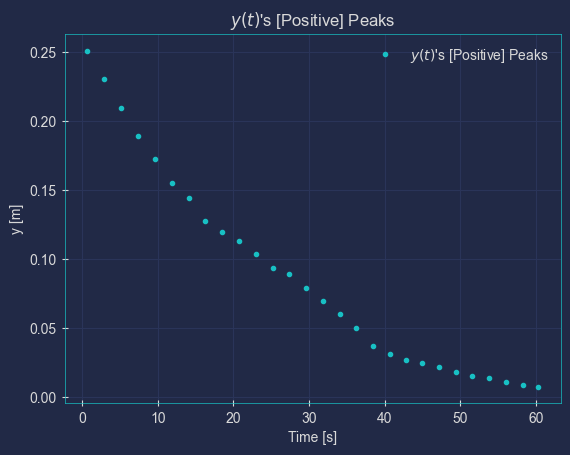

In [6]:
R = 0.80 # m # Change this value to the radius of the track
y_t =  [R - np.sqrt(R**2 - x**2) for x in x[peaks_p]]
t_t = t[peaks_p]

# Plot the data with peaks
plt.plot(t_t, y_t, '.', label=r"$y(t)$'s [Positive] Peaks")
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.title(r"$y(t)$'s [Positive] Peaks")
plt.legend()
plt.show()

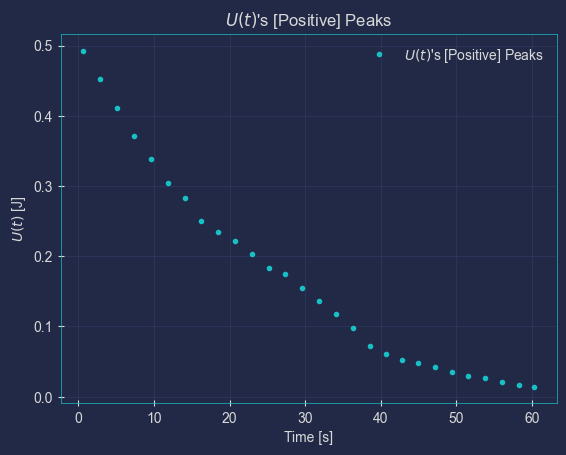

In [7]:
# Pot. energy:
m = 0.2 # kg # Change this value to the mass of the object
g = 9.81 # m/s^2
U = [m * g * y for y in y_t]

# Plot the data with peaks
plt.plot(t_t, U, '.', label=r"$U(t)$'s [Positive] Peaks")
plt.xlabel('Time [s]')
plt.ylabel(r'$U(t)$ [J]')
plt.title(r"$U(t)$'s [Positive] Peaks")
plt.legend()
plt.show()

Automating things, for later:
- Putting everything into a class, for easier massification;
- Testing the class with the provided example.

In [8]:
class CsvAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, skiprows=1, delimiter=';')
        self.name = file_path.split('/')[-1]
        self.t = self.df['t']
        self.x = self.df['x']
        self.y = self.df['y']
        self.peaks_p = None
        self.U = None
        print(f'Read {len(self.df)} rows (from {file_path}).')

    def correct_x(self):
        self.x = self.df['x'] - np.mean(self.df['x'])

    def find_peaks(self, d = 35, p = 0.1):
        self.peaks_p, _ = find_peaks(self.x, distance = d, prominence = p)
        print(f'Found {len(self.peaks_p)} [positive] peaks.')
        
    def transform_to_y(self, R):
        self.y = [R - np.sqrt(R**2 - x**2) for x in self.x]

    def calculate_potential_energy(self, m, g):
        self.U = [m * g * y for y in np.array(self.y)[self.peaks_p]]

    def plot_potential_energy(self):
        plt.plot(self.t[self.peaks_p], self.U, '.', label=r"$U(t)$'s [Positive] Peaks")
        plt.xlabel('Time [s]')
        plt.ylabel(r'$U(t)$ [J]')
        plt.title(r"$U(t)$'s [Positive] Peaks for " + self.name)
        plt.legend()
        plt.show()

    def resolve(self, R, m, g, d, p):
        """
        Resolve the data and plot the potential energy.

        --- Parameters ---
        R: radius of the track [m]
        m: mass of the object [kg]
        g: gravity [m/s^2]
        d: minimum distance between peaks [s]
        p: minimum prominence of peaks [m]

        --- Returns ---
        None
        """
        self.correct_x()
        self.find_peaks(d, p)
        self.transform_to_y(R)
        self.calculate_potential_energy(m, g)
        self.plot_potential_energy()

Yeah, now I just need to run all the other experiments through Tracker, to obtain the $x, y, t$ data, so I can then use the class to calculate the losses. (And compare the results...)

In [11]:
'./Data/FC/FC_Long_1.csv'.split('/')[-1]

'FC_Long_1.csv'

Read 1870 rows (from ../Data/FC/FC_Long_1.csv).
Read 1661 rows (from ../Data/FC/FC_Long_2.csv).
Read 471 rows (from ../Data/FC/FC_Long_3.csv).
Found 28 [positive] peaks.


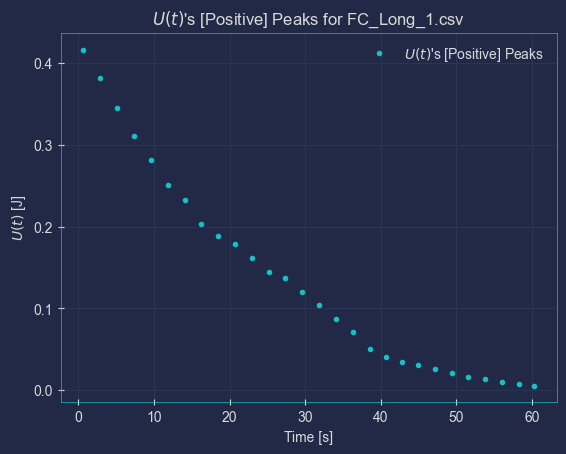

Found 22 [positive] peaks.


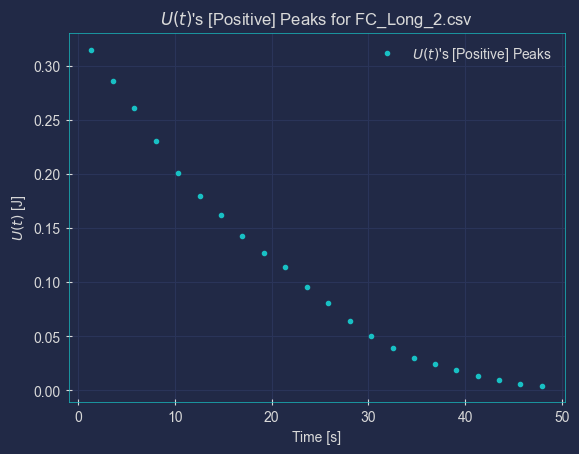

Found 7 [positive] peaks.


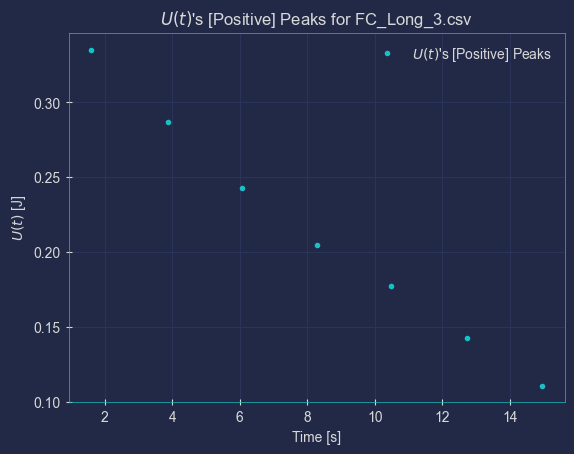

In [13]:
# Required definitions/parameters:
R, m, g, d, p = 0.80, 0.2, 9.81, 35, 0.1

# Test the class
# Running on the other FC_Long files:
csv_analyzer_FC_Long_1 = CsvAnalyzer('../Data/FC/FC_Long_1.csv')
csv_analyzer_FC_Long_2 = CsvAnalyzer('../Data/FC/FC_Long_2.csv')
csv_analyzer_FC_Long_3 = CsvAnalyzer('../Data/FC/FC_Long_3.csv')

csv_analyzer_FC_Long_1.resolve(R, m, g, d, p)
csv_analyzer_FC_Long_2.resolve(R, m, g, d, p)
csv_analyzer_FC_Long_3.resolve(R, m, g, d, p)

I should also use the negative peaks!

Now, I do the same for ZFC, for the same initial height, $h^-$.

Read 3098 rows (from ../Data/ZFC/ZFC_h-_1.csv).
Read 3090 rows (from ../Data/ZFC/ZFC_h-_2.csv).
Found 46 [positive] peaks.


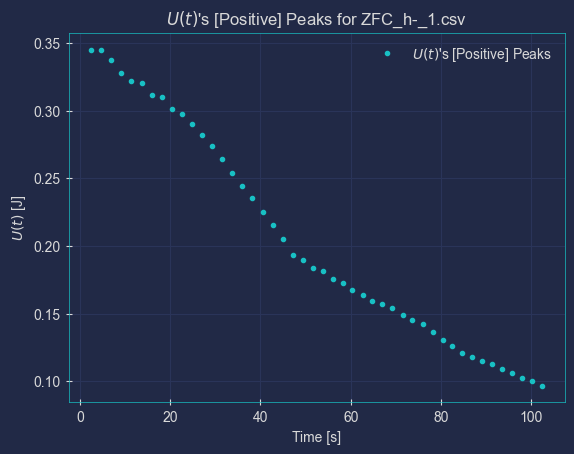

Found 46 [positive] peaks.


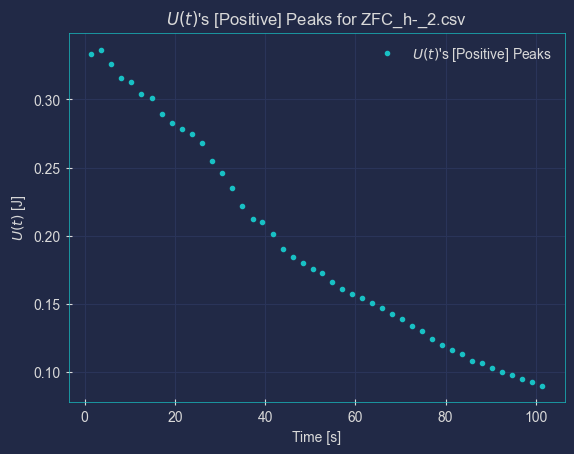

In [14]:
# Reading the data into the class
csv_analyzer_ZFC_h_m_1 = CsvAnalyzer('../Data/ZFC/ZFC_h-_1.csv')
csv_analyzer_ZFC_h_m_2 = CsvAnalyzer('../Data/ZFC/ZFC_h-_2.csv')
csv_analyzer_ZFC_h_m_3 = CsvAnalyzer('../Data/ZFC/ZFC_h-_3.csv')

# Resolving the data
csv_analyzer_ZFC_h_m_1.resolve(R, m, g, d, p)
csv_analyzer_ZFC_h_m_2.resolve(R, m, g, d, p)
csv_analyzer_ZFC_h_m_3.resolve(R, m, g, d, p)

Now, same for a greater initial height, $h^+$:

In [ ]:
# Reading the data into the class
csv_analyzer_ZFC_h_p_1 = CsvAnalyzer('./Data/ZFC/ZFC_h+_1.csv')
csv_analyzer_ZFC_h_p_2 = CsvAnalyzer('./Data/ZFC/ZFC_h+_2.csv')
csv_analyzer_ZFC_h_p_3 = CsvAnalyzer('./Data/ZFC/ZFC_h+_3.csv')

# Resolving the data
csv_analyzer_ZFC_h_p_1.resolve(R, m, g, d, p)
csv_analyzer_ZFC_h_p_2.resolve(R, m, g, d, p)
csv_analyzer_ZFC_h_p_3.resolve(R, m, g, d, p)

I can now compare all the results...